In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [29]:
file_path = 'FlightDelay/full_data_flightdelay.csv'
data = pd.read_csv(file_path, low_memory=False)
data.head(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [30]:
print("Общая информация о данных:")
data.info()

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT  

Набор данных был загружен с сайта Kaggle. Выбран датасет под названием “2019 Airline Delays w/Weather and Airport Detail” (Задержки вылетов авиакомпаний за 2019 год с уточнением погодных условий и аэропортов). Датасет используется для задач классификаций. 


Задержки рейсов являются серьезной проблемой как для путешественников, так и для авиакомпаний, что влечет за собой значительные финансовые и репутационные последствия. Прогнозирование задержек рейсов имеет решающее значение для повышения удовлетворенности клиентов и доходов авиакомпаний. Данный набор данных рассчитан на создание системы машинного обучения, которая могла бы прогнозировать задержки вылетов на основе совокупности факторов. Набор данных включает в себя множество типов данных, таких как время, информация об авиакомпаниях, аэропортах, самолетах и, самое главное, данные о погоде.


Информация была собрана из официальной статистики министерства транспорта США, поэтому записи в наборе содержат информацию только о вылетах из аэропортов США. Используются единицы измерения так же по системе США, т.е. дюймы вместо метров и градусы в Фаренгейтах. Набор содержит 6 489 062 записи. В набор данных включены следующие колонки:


    1. DEP_DEL 15 - целевая переменная. Двоичный класс, который указывает, был ли вылет задержан на 15 минут или более (1 = True / 0 = False).
    2. MONTH - номер месяца, в который произошел перелет. 
    3. DAY_OF_WEEK - номер дня недели, в который произошел полет.
    4. DEP_TIME_BLK - временной интервал для вылетающего воздушного судна в формате: ччмм-ччмм, например: 0800-0859.
    5. DISTANCE_GROUP - группа расстояний, которые должны быть преодолены вылетающим воздушным судном.
    6. SEGMENT_NUMBER - количество рейсов, выполненных воздушным судном за сегодняшний день до текущего рейса.
    7. CONCURRENT_FLIGHTS - количество рейсов, вылетающих из аэропорта в один и тот же период времени.
    8. NUMBER_OF_SEATS - количество мест в самолете.
    9. CARRIER_NAME - название авиакомпании-перевозчика.
    10. AIRPORT_FLIGHTS_MONTH - среднее количество рейсов из аэропорта в месяц.
    11. AIRLINE_FLIGHTS_MONTH - среднее количество рейсов авиакомпании в месяц.
    12. AIRLINE_AIRPORT_FLIGHTS_MONTH - среднее количество рейсов авиакомпании и аэропорта в месяц.
    13. AVG_MONTHLY_PASS_AIRPORT - среднее количество пассажиров в аэропорту вылета за месяц.
    14. AVG_MONTHLY_PASS_AIRLINE - среднее количество пассажиров авиакомпании за месяц.
    15. FLT_ATTENDANTS_PER_PASS - количество бортпроводников на одного пассажира авиакомпании.
    16. GROUND_SERV_PER_PASS - Количество сотрудников наземной службы (service desk) на пассажира авиакомпании.
    17. PLANE_AGE - возраст самолета.
    18. DEPARTING_AIRPORT - название аэропорта вылета.
    19. LATITUDE - широта аэропорта.
    20. LONGITUDE - долгота аэропорта.
    21. PREVIOUS_AIRPORT - название предыдущего аэропорта из которого прилетел самолет.
    22. PRCP - количество осадков в дюймах за день.
    23. SNOW - количество выпавшего снега в дюймах за день.
    24. SNWD - толщина снежного покрова в дюймах за день.
    25. TMAX - максимальная температура в течение дня.
    26. AWND - максимальная скорость ветра в течение дня, в м/с.

## Подготовка данных

In [31]:
duplicates = data.duplicated().sum()
print(f"Количество дубликатов в данных: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()

Количество дубликатов в данных: 28473


In [32]:
print("Количество пропусков в данных:")
data.isna().sum()

Количество пропусков в данных:


MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [33]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"Категориальные колонки: {list(categorical_columns)}")

# Преобразование категориальных переменных в числовой формат через label encoding
if len(categorical_columns) > 0:
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
print(label_encoders['DEP_TIME_BLK'].classes_)

Категориальные колонки: ['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
['0001-0559' '0600-0659' '0700-0759' '0800-0859' '0900-0959' '1000-1059'
 '1100-1159' '1200-1259' '1300-1359' '1400-1459' '1500-1559' '1600-1659'
 '1700-1759' '1800-1859' '1900-1959' '2000-2059' '2100-2159' '2200-2259'
 '2300-2359']


In [34]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 6460589 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   int64  
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   int64  
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              int64  
 18  LATITUD

In [35]:
new_column_names = {
    "MONTH": "M",
    "DAY_OF_WEEK": "D",
    "DEP_DEL15": "DELAY",
    "DEP_TIME_BLK": "TimeG",
    "DISTANCE_GROUP": "DistG",
    "SEGMENT_NUMBER": "SegNum",
    "CONCURRENT_FLIGHTS": "Concur",
    "NUMBER_OF_SEATS": "Seats",
    "CARRIER_NAME": "Airline",
    "AIRPORT_FLIGHTS_MONTH": "AvgFlAP",
    "AIRLINE_FLIGHTS_MONTH": "AvgFlAL",
    "AIRLINE_AIRPORT_FLIGHTS_MONTH": "AvgFlALAP",
    "AVG_MONTHLY_PASS_AIRPORT": "AvgPassAP",
    "AVG_MONTHLY_PASS_AIRLINE": "AvgPassAL",
    "FLT_ATTENDANTS_PER_PASS": "FltAttend",
    "GROUND_SERV_PER_PASS": "GroundServ",
    "PLANE_AGE": "PlaneAge",
    "DEPARTING_AIRPORT": "DepAirport",
    "PREVIOUS_AIRPORT": "PrevAirport",
}

data.rename(columns=new_column_names, inplace=True)
data.columns

Index(['M', 'D', 'DELAY', 'TimeG', 'DistG', 'SegNum', 'Concur', 'Seats',
       'Airline', 'AvgFlAP', 'AvgFlAL', 'AvgFlALAP', 'AvgPassAP', 'AvgPassAL',
       'FltAttend', 'GroundServ', 'PlaneAge', 'DepAirport', 'LATITUDE',
       'LONGITUDE', 'PrevAirport', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND'],
      dtype='object')

In [36]:
data.head(5)

,M,D,DELAY,TimeG,DistG,SegNum,Concur,Seats,Airline,AvgFlAP,...,PlaneAge,DepAirport,LATITUDE,LONGITUDE,PrevAirport,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,3,2,1,25,143,14,13056,...,8,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
1,1,7,0,2,7,1,29,191,6,13056,...,3,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
2,1,7,0,1,7,1,27,199,6,13056,...,18,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
3,1,7,0,1,9,1,27,180,6,13056,...,2,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0,7,1,10,182,15,13056,...,1,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91


## Распределение задержек в данных

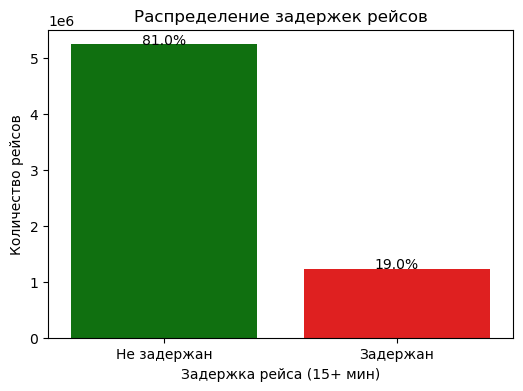

In [37]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data, x='DELAY', palette=['green', 'red'])

total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5000, f'{height/total:.1%}', ha="center")

plt.xticks(ticks=[0, 1], labels=['Не задержан', 'Задержан'])
plt.xlabel('Задержка рейса (15+ мин)')
plt.ylabel('Количество рейсов')
plt.title('Распределение задержек рейсов')
plt.show()


Видим, что задержки рейсов более чем на 15 минут встречаются в 19% всех полетных данных. Хотя данный процент не критично велик, даже такое количество сильно влияет на финансы и репутацию авиакомпаний.

## Анализ выбросов в данных

In [38]:
data.describe()

,M,D,DELAY,TimeG,DistG,SegNum,Concur,Seats,Airline,AvgFlAP,...,PlaneAge,DepAirport,LATITUDE,LONGITUDE,PrevAirport,PRCP,SNOW,SNWD,TMAX,AWND
count,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,...,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06,6.460589e+06
mean,6.606805e+00,3.935691e+00,1.898257e-01,8.221450e+00,3.822069e+00,3.054530e+00,2.783980e+01,1.337388e+02,9.123352e+00,1.268879e+04,...,1.153303e+01,4.283378e+01,3.671504e+01,-9.421791e+01,1.860327e+02,1.037656e-01,3.162311e-02,9.162620e-02,7.146548e+01,8.341698e+00
std,3.396786e+00,1.995232e+00,3.921632e-01,4.879641e+00,2.381966e+00,1.755898e+00,2.152390e+01,4.647017e+01,5.142780e+00,8.841598e+03,...,6.937481e+00,2.729191e+01,5.490430e+00,1.785424e+01,8.679297e+01,3.433433e-01,3.171706e-01,7.283831e-01,1.835704e+01,3.607858e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,0.000000e+00,1.100000e+03,...,0.000000e+00,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.000000e+00,5.345000e+03,...,5.000000e+00,1.700000e+01,3.343600e+01,-1.063770e+02,1.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.000000e+01,1.156200e+04,...,1.200000e+01,4.200000e+01,3.750500e+01,-8.790600e+01,2.160000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,1.200000e+01,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.400000e+01,1.761500e+04,...,1.700000e+01,6.500000e+01,4.077900e+01,-8.093600e+01,2.440000e+02,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.800000e+01,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,1.600000e+01,3.525600e+04,...,3.200000e+01,9.500000e+01,6.116900e+01,-6.600200e+01,3.550000e+02,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


<Axes: >

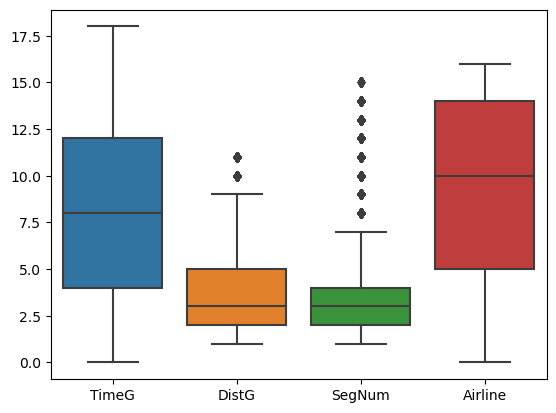

In [39]:
sns.boxplot(data[["TimeG", "DistG", "SegNum", "Airline"]])

Видим выбросы в двух атрибутах. Переменная DistG является категориальной, большие значения соответствуют перелетам на большие дистанции, которые действительно совершаются реже.

In [40]:
segment_condition = data["SegNum"] > 7
segment_records = data[segment_condition]

print(f"Записи, где SEGMENT_NUMBER > 7 (всего: {len(segment_records)}):")
print(f"Процент записей c выбросами : {round((len(segment_records)/len(data))*100,1)}%")

Записи, где SEGMENT_NUMBER > 7 (всего: 100531):
Процент записей c выбросами : 1.6%


Имеем 1,5% записей, для которых запланированный перелет минимум седьмой за день. Такое характерно для малой авиации или разворотных перелетов на ближние дистанции, когда борт загружает топливо сразу на несколько рейсов и не задерживается в аэропорту надолго. 

<Axes: >

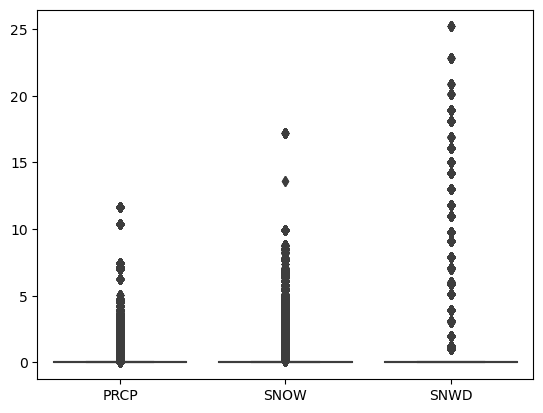

In [41]:
sns.boxplot(data[["PRCP", "SNOW", "SNWD"]])

In [42]:
snow_condition = data["SNOW"] > 0
count_snow = snow_condition.sum()
print(f"Количество записей с присутствием снега: {count_snow}")
print(f"Всего записей: {len(data)}")
print(f"Процент записей, в которых присутствует снег: {round((count_snow/len(data))*100,1)}%")

Количество записей с присутствием снега: 161703
Всего записей: 6460589
Процент записей, в которых присутствует снег: 2.5%


Видим, что основная масса записей имеет нулевое значение, из-за чего все ненулевые значения попадают в выбросы. Всего в 2,5% записях присутствуют данные о снеге, что справедливо для рассматриваемых географических регионов. Именно такие данные самые ценные для анализа, поскольку погодные условия - самый важный фактор, влияющий на задержки воздушного движения.

<Axes: >

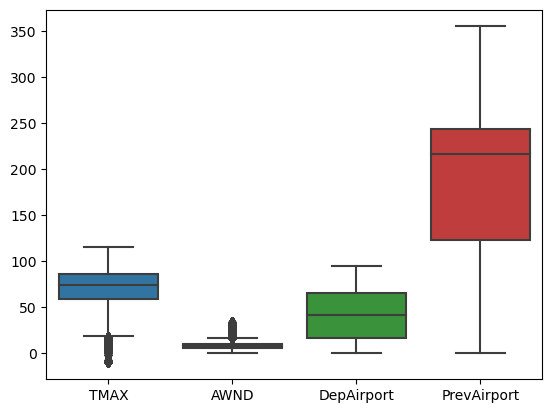

In [44]:
sns.boxplot(data[["TMAX", "AWND", "DepAirport", "PrevAirport"]])

Температура имеет выбросы в интервале отрицательных значений, что коррелирует с выбросами данных о снежной погоде. Выбросы скорости ветра в сторону высоких значений оправданы природными условиями и предрасположенности данной местности к ураганным и вихревым ветрам. Данные выбросы также имеют большую ценность для анализа.

<Axes: >

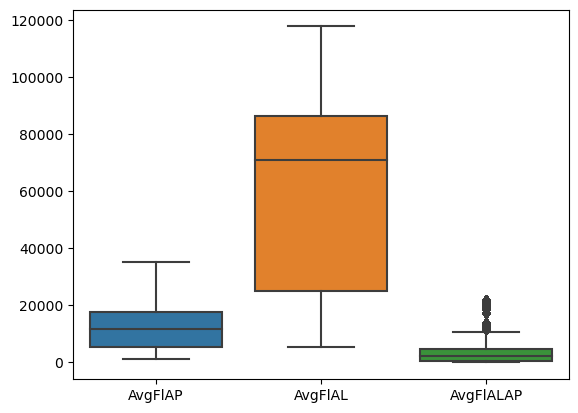

In [45]:
sns.boxplot(data[["AvgFlAP", "AvgFlAL", "AvgFlALAP"]])

<Axes: >

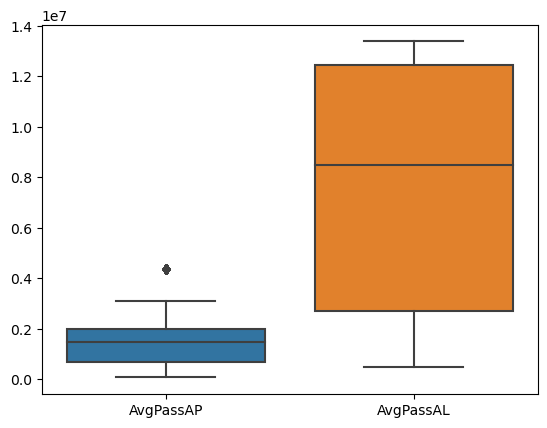

In [46]:
sns.boxplot(data[["AvgPassAP", "AvgPassAL"]])

<Axes: >

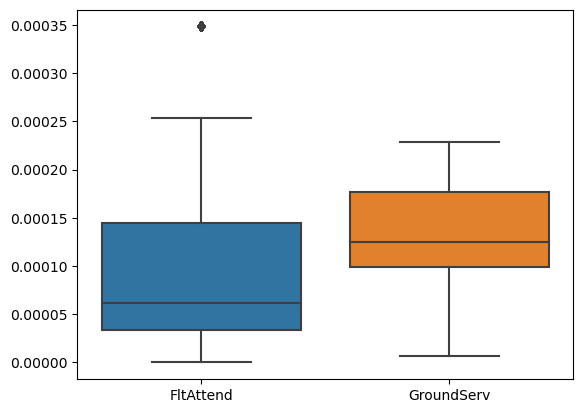

In [47]:
sns.boxplot(data[["FltAttend", "GroundServ"]])

<Axes: >

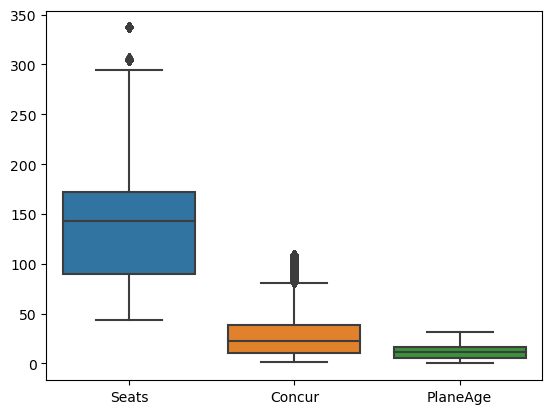

In [48]:
sns.boxplot(data[["Seats", "Concur", "PlaneAge"]])

В некоторых из атрибутов присутствуют выбросы в сторону аномально больших значений, и все их можно отнести к загруженным крупным аэропортам или крупным самолетам с большим количеством пассажиров и членов экипажа.

## Корреляционный анализ

Используем коэффициент Спирмена т.к. у нас большой набор числовых данных с небольшими выбросами

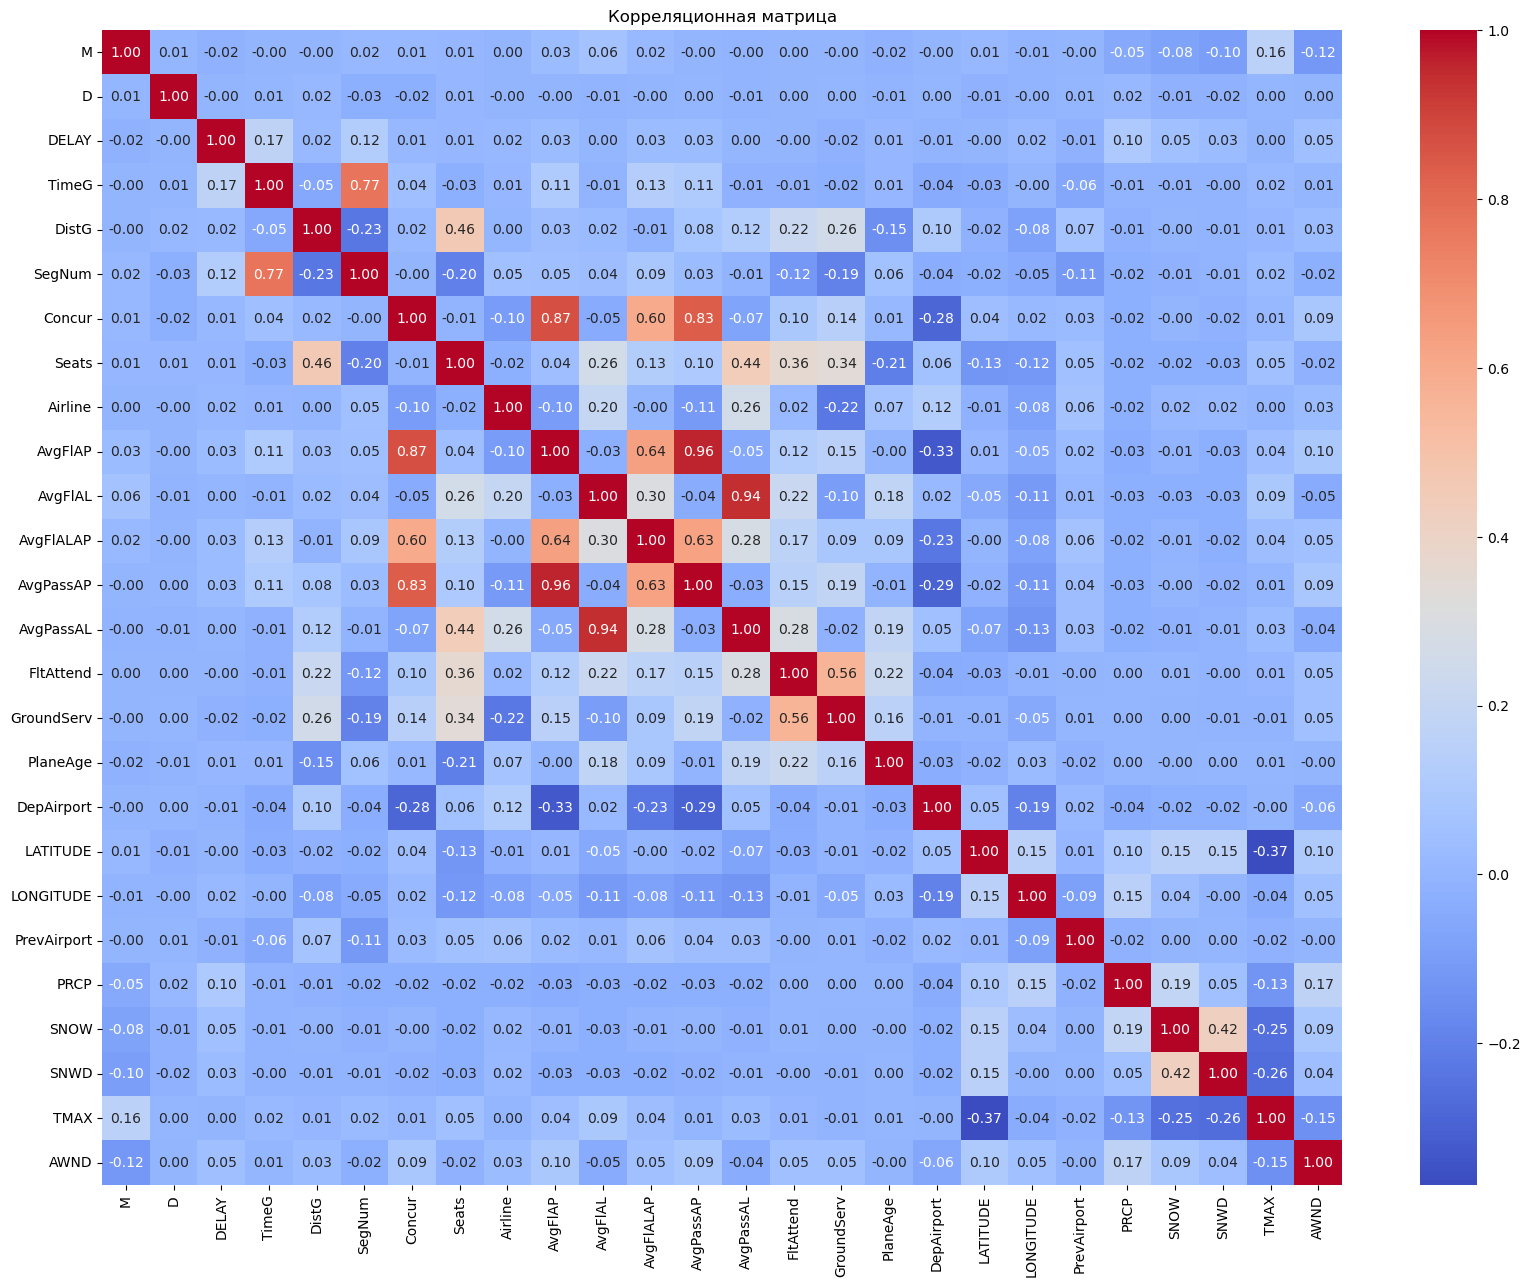

In [49]:
correlation_matrix = data.corr(method='spearman')
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

Видим, что для большинства атрибутов значение корреляции по модулю  < 0,2. Это означает очень слабую корреляцию или практически её отсутствие. Целевой признак задержки ни с одним атрибутом не имеет значимой корреляции.


Сильные корреляции имеют только атрибуты, взаимосвязанные по смыслу. Например, глубина снега и количество осадков снега, группа времени и номер вылета за день, количество пассажиров и количество перелетов для аэропорта и для авиакомпании, дистанция перелета и количество мест и т.д. 


Таким образом, корреляционный анализ показывает, какие атрибуты можно сгруппировать (погодные условия, количество перелетов и пассажиров и т.д.). Однако не удалось обнаружить ни одного значительного влияния на целевую переменную, то есть эти зависимости не представлены в явном виде, и придется использовать другие виды анализа для выявления закономерностей.

## Распределение задержек по месяцам, дням недели и времени вылета

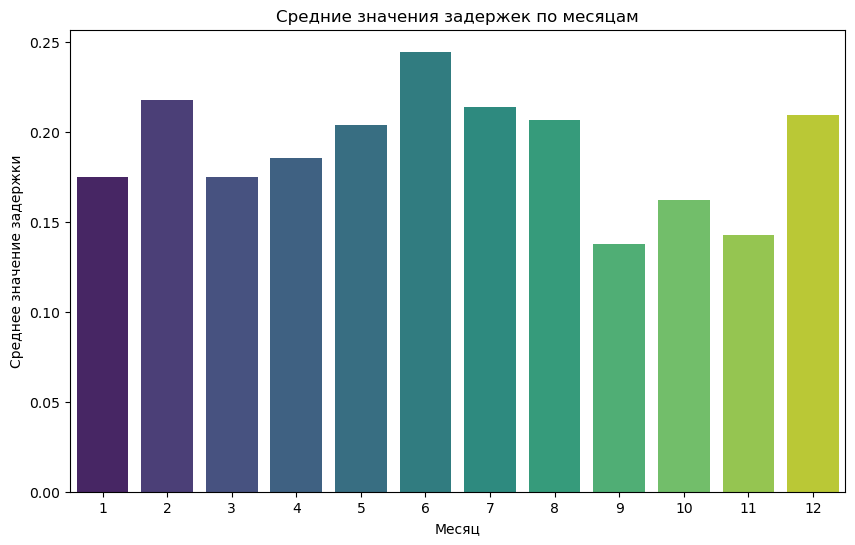

In [50]:
grouped_data = data.groupby("M")["DELAY"].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="viridis")
plt.xlabel("Месяц")
plt.ylabel("Среднее значение задержки")
plt.title("Средние значения задержек по месяцам")
plt.show()

Среднее значение (вероятность) задержки очень сильно разнится по месяцам. Это можно объяснить разницей погодных условий, а также различной загруженностью аэропортов в разные сезоны. 

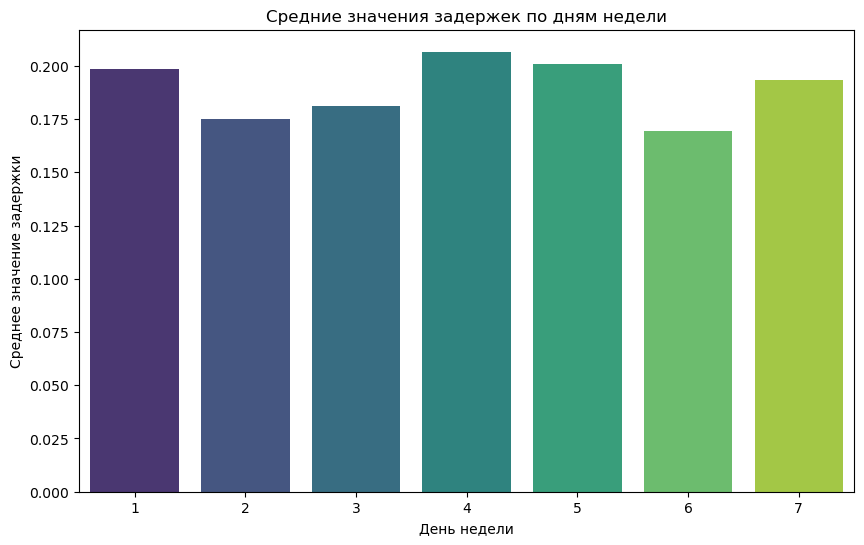

In [51]:
grouped_data = data.groupby("D")["DELAY"].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="viridis")
plt.xlabel("День недели")
plt.ylabel("Среднее значение задержки")
plt.title("Средние значения задержек по дням недели")
plt.show()

(«1» – воскресенье, «2» - понедельник и т.д.)

Различие по дням недели не такое существенное, как по месяцам, поскольку они представляют собой более короткий временной интервал наблюдений. Видим, что в выходные вероятность задержки больше, вероятно, это также связано с разной загруженностью и пассажиропотоком.

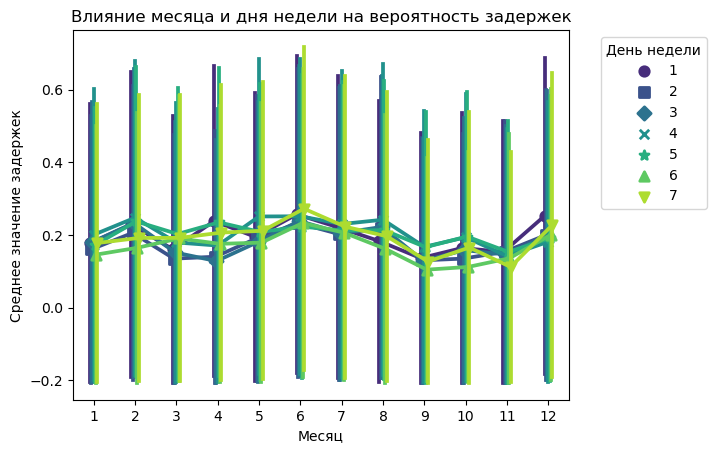

In [52]:
# Взаимодействие двух факторов: MONTH и DAY_OF_WEEK
sns.pointplot(
    x="M", 
    y="DELAY", 
    hue="D", 
    data=data, 
    palette="viridis", 
    dodge=True, 
    markers=["o", "s", "D", "x", "*", "^", "v"],
    ci="sd"
)
plt.title("Влияние месяца и дня недели на вероятность задержек")
plt.ylabel("Среднее значение задержек")
plt.xlabel("Месяц")
plt.legend(title="День недели", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


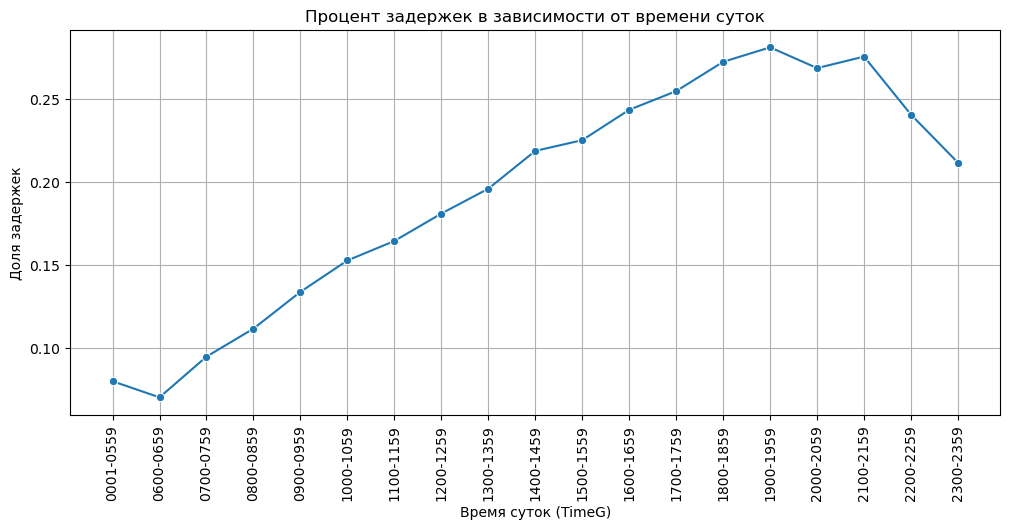

In [53]:
# Восстанавливаем оригинальные интервалы времени
time_intervals = label_encoders['DEP_TIME_BLK'].inverse_transform(data['TimeG'])

# Создаем новый столбец с нормальными значениями времени
data['TimeG_decoded'] = time_intervals

# Группируем по расшифрованным временным интервалам
delay_by_time = data.groupby('TimeG_decoded')['DELAY'].mean().reset_index()

# Визуализация
plt.figure(figsize=(12, 5))
sns.lineplot(data=delay_by_time, x='TimeG_decoded', y='DELAY', marker='o')

plt.xticks(rotation=90)
plt.xlabel('Время суток (TimeG)')
plt.ylabel('Доля задержек')
plt.title('Процент задержек в зависимости от времени суток')
plt.grid()
plt.show()


Пик задержек приходится на вечернее время, что коррелирует с загруженностью аэропортов.

## Географическое распределение

In [54]:
import folium
from folium.plugins import HeatMap

# Группируем по аэропортам
airport_delays = data.groupby(['DepAirport', 'LATITUDE', 'LONGITUDE'])['DELAY'].mean().reset_index()

# Создаем карту
m = folium.Map(location=[37, -95], zoom_start=4)  # Центрируем на США

# Добавляем точки
for _, row in airport_delays.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=row['DELAY'] * 20,  # Размер точки в зависимости от % задержек
        color='red' if row['DELAY'] > 0.2 else 'orange',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['DepAirport']}: {row['DELAY']:.1%} задержек"
    ).add_to(m)

# Отображаем карту
m

Видно, что больше 20% задержек рейсов в основном случается в крупных аэропортах. Это может быть связано с высокой загруженностью и бльшим пассажиропотоком.